In [8]:
import os
import sys

sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data


import torchvision.transforms as transforms
import torch.optim as optim

torch.manual_seed(1)

from src.models.LSTM_model import LSTMTagger, DemoDatasetNN
from src.utils.utils import prepare_data
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'utils'

In [9]:
raw_data_path = r'..\\data\\raw\\'
processed_data_path = '..\\data\\processed\\'

os.listdir(processed_data_path)

['.gitkeep', 'all_datasets_combined.csv', 'test_alwin.csv']

In [10]:
path = processed_data_path + 'all_datasets_combined.csv'
df_data = pd.read_csv(path)#, dtype=np.float64)

print(df_data.columns)


true_labels = df_data['labels'].values.reshape(-1, 1) 
df_data.drop(['labels'], axis=1, inplace=True)
data = df_data.values

n_samples, n_features = data.shape
print(n_samples, n_features)

Index(['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'lacc_x',
       'lacc_y', 'lacc_z', 'eul_x', 'eul_y', 'eul_z', 'acc_x_DC', 'acc_x_AC',
       'acc_y_DC', 'acc_y_AC', 'acc_z_DC', 'acc_z_AC', 'labels'],
      dtype='object')
102422 18


In [9]:
train_size = 0.7

X_train = data[:int(n_samples * train_size), :]
y_train = true_labels[:int(n_samples * train_size), :]

X_test = data[int(n_samples * train_size):, :]
y_test = true_labels[int(n_samples * train_size):, :]

print("X_train shape is: {}".format(X_train.shape))
print("y_train shape is: {}".format(y_train.shape))
print("X_test shape is: {}".format(X_test.shape))
print("y_test shape is: {}".format(y_test.shape))

X_train shape is: (71695, 18)
y_train shape is: (71695, 1)
X_test shape is: (30727, 18)
y_test shape is: (30727, 1)


In [10]:
seq_length = 0
batch_size = 512

training_dataset = DemoDatasetNN(X_train, y_train, 
                                   seq_length, transforms=None)

training_loader = Data.DataLoader(training_dataset, batch_size, 
                                  shuffle=True, drop_last=False,
                                  num_workers=0)


test_dataset = DemoDatasetNN(X_test, y_test, 
                               seq_length, transforms=None)

test_loader = Data.DataLoader(test_dataset, batch_size, 
                              shuffle=True, drop_last=False,
                              num_workers=0)

In [11]:
for data, labels in training_loader:
    print(data.shape)

    print(labels.shape)
    
    print(data)
    print(labels)
    break

torch.Size([512, 18])
torch.Size([512, 1])
tensor([[ 0.1408,  0.1839, -0.4676,  ...,  0.0762, -0.3805, -0.4860],
        [ 0.2282,  0.0203, -0.4455,  ...,  0.0053, -0.4339, -0.4337],
        [ 0.6528,  0.1056, -0.3440,  ..., -0.0121, -0.3787, -0.3552],
        ...,
        [-0.5611, -0.4080, -0.0172,  ...,  0.0210,  0.3907, -0.4214],
        [ 0.1889,  0.1225, -0.3718,  ...,  0.0540, -0.3411, -0.4051],
        [-0.2041,  0.1730,  0.1171,  ...,  0.0289,  0.6353, -0.4101]],
       dtype=torch.float64)
tensor([[2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [6.],
        [0.],
        [2.],
        [8.],
        [2.],
        [2.],
        [2.],
        [0.],
        [2.],
        [2.],
        [0.],
        [1.],
        [0.],
        [1.],
        [2.],
        [1.],
        [2.],
        [2.],
        [0.],
        [0.],
        [0.],
        [1.],
        [2.],
        [1.],
        [2.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
     

In [23]:
class Net(nn.Module):

    def __init__(self, num_features, num_classes):
        super().__init__()
        
        self.input_size = num_features
        self.output_size = num_classes
        
        self.hidden1 = nn.Linear(num_features, 60)
        self.hidden2 = nn.Linear(60, 40)
        self.hidden3 = nn.Linear(40, 30)
        self.output = nn.Linear(30, num_classes)

    def forward(self, x):
        x = self.hidden1(x)
        x = F.relu(x)
        
        x = self.hidden2(x)
        x = F.relu(x)
        
        x = self.hidden3(x)
        x = F.relu(x)
        
        
        x = self.output(x)
        return x


Net(
  (hidden1): Linear(in_features=18, out_features=60, bias=True)
  (hidden2): Linear(in_features=60, out_features=40, bias=True)
  (hidden3): Linear(in_features=40, out_features=30, bias=True)
  (output): Linear(in_features=30, out_features=9, bias=True)
)

In [25]:
losses = []
for epochs in range(10):
    for data, labels in training_loader:
        
        optimizer.zero_grad()
        
        output = model(data)
        # remove the 1 dimension for output
        output = output.squeeze()
        #print(output.shape)
        
        
        
        #labels = (labels * 10).long()
        labels = labels.view(-1).long()
        #rint(labels[0:1])
        
        
        
        
        loss = loss_function(output, labels)
        losses.append(loss)
        
        loss.backward()
        
        optimizer.step()
        
        #print(loss)
        

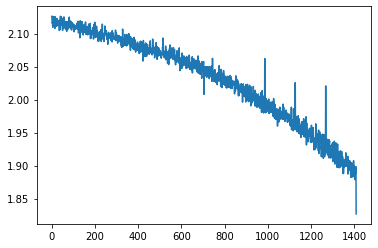

In [26]:
plt.plot(losses)

In [27]:
prediction_list = []
def predict(dataloader):
    with torch.no_grad():
        for i, (data, labels) in enumerate(dataloader):
            output = model(data)
            _, preds_tensor = torch.max(output, 1)
            prediction_list.append(preds_tensor)
        
    return torch.cat(prediction_list, 0).numpy()          

In [28]:
predicted_labels = predict(test_loader) 
true_labels = np.squeeze(y_test)

In [29]:
print ("Actual:", true_labels[:10])
print ("Predicted:", predicted_labels[:10])

Actual: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
Predicted: [2 2 2 2 2 2 2 2 2 2]


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(true_labels, predicted_labels)

0.4847528232499105

In [11]:
unique, counts = np.unique(true_labels, return_counts=True)
dict(zip(unique, counts))

{0.0: 19699,
 1.0: 24251,
 2.0: 51055,
 3.0: 1715,
 4.0: 636,
 5.0: 309,
 6.0: 1568,
 7.0: 1758,
 8.0: 1431}

In [ ]:
unique, counts = np.unique(predicted_labels, return_counts=True)
dict(zip(unique, counts))

In [13]:
classes_dict = {0: 'Standing', 1: 'Sitting', 2: 'Walking',
                3:'Stand-to-walk', 4:'Stand-to-sit', 5: 'Sit-to-stand',
                6:' Walk-to-stand', 7:'Sit-to-walk', 8: 'Walk-to-sit'}
classes_list = list(classes_dict.values())

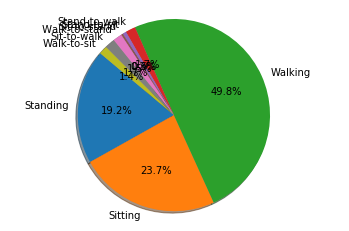

In [15]:
# Data to plot
labels = classes_list
sizes = counts
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, #colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

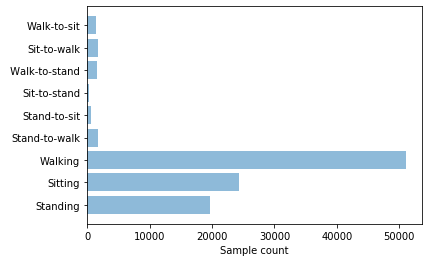

In [20]:
objects = labels
y_pos = np.arange(len(objects))
plt.barh(y_pos, sizes, align='center', alpha=0.5)
plt.xlabel('Sample count')
plt.yticks(y_pos, objects)


plt.show()